In [1]:
import numpy as np
import scipy.stats as sps
import random

# Flipping coins..
Alice and Bob each have a coin and flip it until they get a heads. If Bob flipped his coin more times than Alice, what is the expected number of times Alice flipped her coin?

From https://openquant.co/questions/more-heads

## Solution from website
Don't understand why it has to be this complicated..

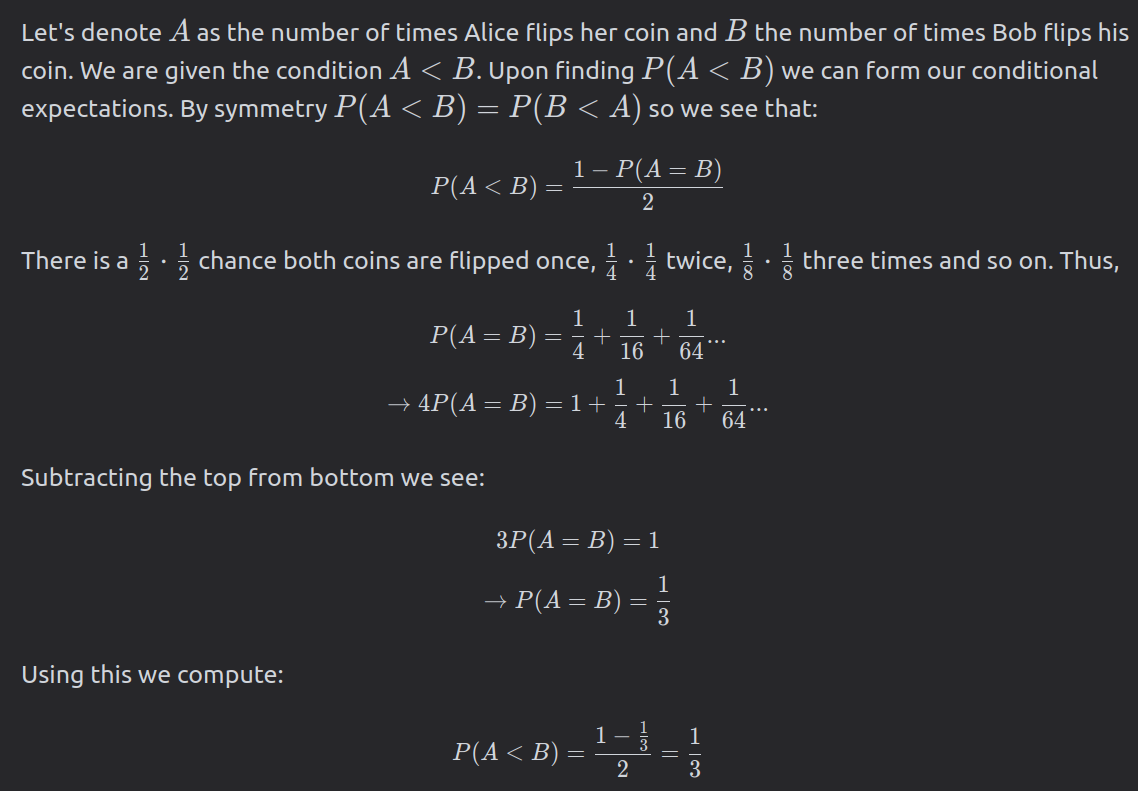

How to compute conditional expectation?
\begin{align}
P(A|A<B) &= \frac{P(A \text{ and } A<B)}{P(A<B)}\\
E[A|A<B] &= \sum_n^\infty n P(A=n|A<B)\\
&= \sum_n^\infty n \frac{P(A=n \text{ and } A<B)}{P(A<B)}\\
&= \frac{1}{P(A<B)}\sum_n^\infty n P(A=n \text{ and } A<B)\\
\end{align}

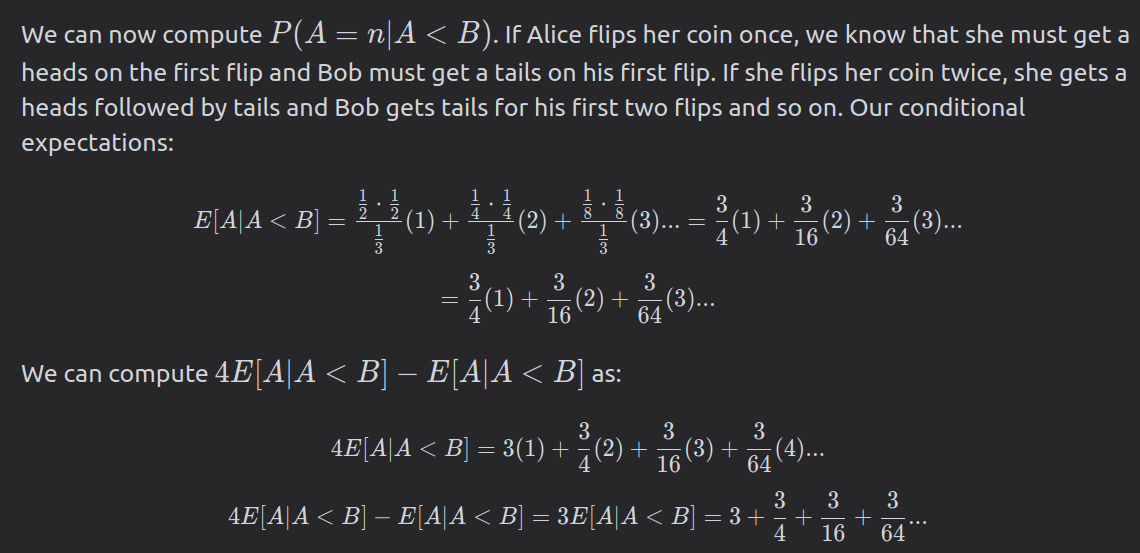

I.e.
\begin{align}
E[A|A<B] = 1+\frac{1}{4}+\frac{1}{16}+\frac{1}{64}+\cdots
\end{align}

Note that this is a geometric series,
\begin{align}
a+ar+ar^2+\cdots=\sum_{k=0}^\infty ar^k
\end{align}
with $a = 1$, $r=\frac{1}{4}$

This series converges since $r<1$ and it converges to
\begin{align}
S &= \frac{a}{1-r}\\
&= \frac{1}{1-\frac{1}{4}}\\
&= \frac{4}{3}
\end{align}

In [2]:
flip_coin = lambda: True if random.randint(1,2) == 1 else False

alice_flip_counts = []
num_iters = 100_000
#num_iters = 100 # for debugging etc

# trial ends when either A or B flips head, but let B go first
for i in range(num_iters):
    
    # resetting alice flip count
    alice_flips = 0
    
    while(True):
        # Bob flips coin
        bob_flips_heads = flip_coin()
        if bob_flips_heads:
            # Don't record this case.
            # B flips more than A.
            # Can think of this as B and A flipping one after the other
            # with B going first. And throw away the trial if B flips
            # a head first.
            break
            
        alice_flips += 1

        # Alice flips coin
        alice_flips_heads = flip_coin()
        if alice_flips_heads:
            alice_flip_counts.append(alice_flips)
            break

#expecting close to 4/3
print(sum(alice_flip_counts) / len(alice_flip_counts))

1.3351999036608864


## My numerical solution
Number of trials before first success is a random variable distributed according to the geometric distribution.

In [3]:
my_p = 0.5
num_trials = 100_000

# top row for A, bottom row for B
x = sps.geom.rvs(p=my_p, size=(2, num_trials)) 

# B flipped strictly more than A
mask = x[0,:]<x[1,:]
sel_x = x[0,mask]

# Using sample mean to approx expectation
res = np.mean(sel_x)

print(res)

1.3327404280976787
